# 1. Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing the data

In [2]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# 3. Data Understanding

In [3]:
salary_data.shape

(30, 2)

In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
print("Mean\n",salary_data.mean(),'\n','\nStandard Deviation\n',salary_data.std())

Mean
 YearsExperience        5.313333
Salary             76003.000000
dtype: float64 
 
Standard Deviation
 YearsExperience        2.837888
Salary             27414.429785
dtype: float64


Before applying the linear regression we will have to normalize the data as we have high variance in the data

# 4.Normalization 

We have 3 normalization techniques, which are:
1. Standardization (StandardScaler)
2. MinMaxScaler    
3. RobustScaler    

Here I will be using Standardization technique

In [8]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_input = std_scaler.fit_transform(salary_data)
scaled_input

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716],
       [-0.82909552, -0.58815781],
       [-0.75741579, -0.79981746],
       [-0.75741579, -0.42881019],
       [-0.57821647, -0.69801306],
       [-0.50653674, -0.47433279],
       [-0.47069688, -0.74976858],
       [-0.47069688, -0.70662043],
       [-0.43485702, -0.70201994],
       [-0.29149756, -0.55250402],
       [-0.1481381 , -0.29921736],
       [-0.07645838, -0.37004264],
       [-0.00477865,  0.26285865],
       [ 0.21026054,  0.19885989],
       [ 0.2461004 ,  0.66547573],
       [ 0.53281931,  0.58377993],
       [ 0.6403389 ,  0.82623317],
       [ 0.92705781,  0.93861127],
       [ 1.03457741,  1.40274136],
       [ 1.21377673,  1.24020308],
       [ 1.32129632,  1.09740238],
       [ 1.50049564,  1.51986835],
       [ 1.5363355 ,  1.3590738 ],
       [ 1.78721455,

In [9]:
scaled_input = pd.DataFrame(data= scaled_input)
scaled_input

,0,1
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


In [16]:
scaled_input.columns = ['YearsExperience','Salary']

In [17]:
scaled_input

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


In [18]:
print("Mean\n",scaled_input.mean(),'\n','\nStandard Deviation\n',scaled_input.std())

Mean
 YearsExperience   -7.401487e-18
Salary            -4.440892e-17
dtype: float64 
 
Standard Deviation
 YearsExperience    1.017095
Salary             1.017095
dtype: float64


Now that the data is normalized we move forward with asumption checking

### Here our problem is to know the salary based on years of experience, so our input which is x is Years of Experience and our Output which is y is Salary.

# 5. Assumptions Checking

In this problem we have to predict the delivery time based on sorting time. So our input which is x will be sorting time and output y will be delivery time.

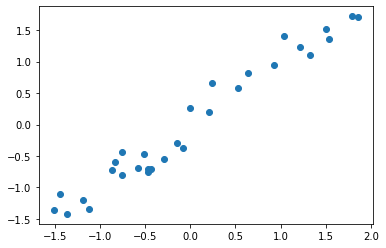

In [19]:
plt.scatter(x = 'YearsExperience',y = 'Salary', data = scaled_input)

In [20]:
scaled_input.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# 6. Model Buinding and Training

In [21]:
import statsmodels.formula.api as sfa

In [22]:
#Building linear regression using ordinary least square technique
linear_model = sfa.ols('Salary~YearsExperience',data = scaled_input).fit()
linear_model.params

Intercept         -6.938894e-18
YearsExperience    9.782416e-01
dtype: float64

In [23]:
train_data = scaled_input[['YearsExperience']]
train_data

,YearsExperience
0,-1.510053
1,-1.438373
2,-1.366693
3,-1.187494
4,-1.115814
5,-0.864935
6,-0.829096
7,-0.757416
8,-0.757416
9,-0.578216


In [24]:
linear_model.predict(train_data)

0    -1.477197
1    -1.407077
2    -1.336956
3    -1.161656
4    -1.091536
5    -0.846116
6    -0.811056
7    -0.740936
8    -0.740936
9    -0.565635
10   -0.495515
11   -0.460455
12   -0.460455
13   -0.425395
14   -0.285155
15   -0.144915
16   -0.074795
17   -0.004675
18    0.205686
19    0.240746
20    0.521226
21    0.626406
22    0.906887
23    1.012067
24    1.187367
25    1.292547
26    1.467847
27    1.502907
28    1.748328
29    1.818448
dtype: float64

# 7. Model Evaluation

In [25]:
linear_model.aic, linear_model.rsquared

(-5.230123812899613, 0.9569566641435086)

# 8. Model Deployment

In [26]:
from pickle import dump

In [27]:
dump(linear_model,open('linear_model.pkl','wb')) #Serialzation

In [28]:
from pickle import load

In [29]:
loaded_model = load(open('linear_model.pkl','rb')) #Deserialzation

In [30]:
loaded_model.predict(scaled_input)

0    -1.477197
1    -1.407077
2    -1.336956
3    -1.161656
4    -1.091536
5    -0.846116
6    -0.811056
7    -0.740936
8    -0.740936
9    -0.565635
10   -0.495515
11   -0.460455
12   -0.460455
13   -0.425395
14   -0.285155
15   -0.144915
16   -0.074795
17   -0.004675
18    0.205686
19    0.240746
20    0.521226
21    0.626406
22    0.906887
23    1.012067
24    1.187367
25    1.292547
26    1.467847
27    1.502907
28    1.748328
29    1.818448
dtype: float64